# Analysis
1>Lot more Urban drivers and hence fares are lower
2>There are some suburban cities where the ride count is high but there are less drivers
3>Big variations in fares in rural ctites

In [64]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [65]:
#set path to csv files
city_data_path = "raw_data/city_data.csv"
ride_data_path = "raw_data/ride_data.csv"
#read csv's into dataframes
df_city_data = pd.read_csv(city_data_path)
df_ride_data = pd.read_csv(ride_data_path)


In [66]:
#group by city and type to get driver count
#merge city and ride data 
driver_cnt_by_city = df_city_data.groupby(["city","type"])['driver_count'].sum()
df_city_data = driver_cnt_by_city.reset_index()
#merge city and ride data
df_city_ride_data = df_city_data.merge(df_ride_data,on="city",how="outer")


In [67]:
#group merged data by city and type and ride count, average fare
df_city_type_grp = df_city_ride_data.groupby(["city","type"])
ds_city_ride_cnt = df_city_type_grp["ride_id"].count()
ds_city_avg_fare = df_city_type_grp["fare"].mean()
#form new Data frame for Buble plot
df_city_stats = pd.concat([ds_city_ride_cnt, ds_city_avg_fare,driver_cnt_by_city], axis=1)

df_city_stats = df_city_stats.reset_index("type")
df_city_stats= df_city_stats.rename(columns = { "type" : "City Types",
                                                "ride_id":"Total Number of Rides(Per City)",
                                                "fare":"Average Fare($)"
                                              })



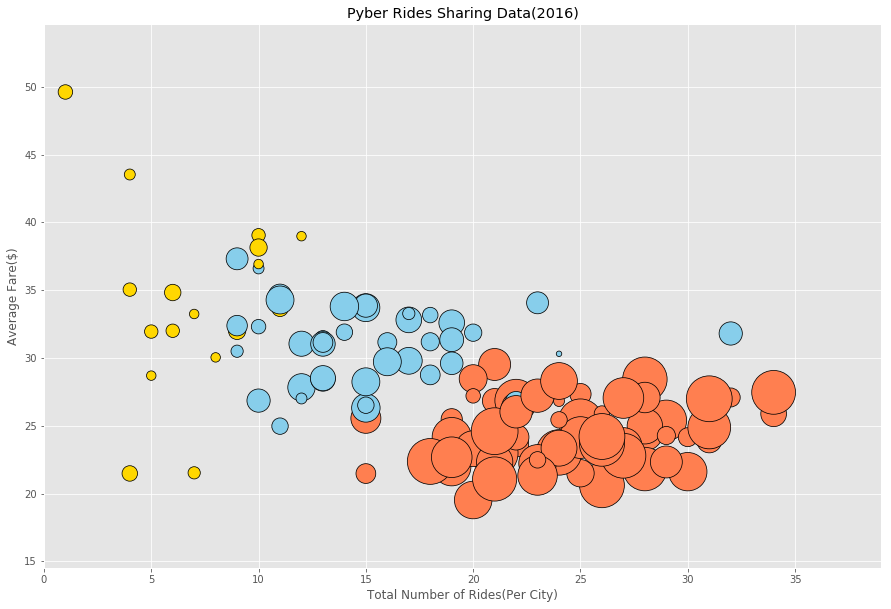

In [68]:
#display scatter plot using new data frame
plt.style.use('ggplot')
clr = {'Rural' : 'Gold','Suburban' : 'SkyBlue','Urban':'coral'}
test = df_city_stats.plot(kind="scatter",x="Total Number of Rides(Per City)",y="Average Fare($)",
                   title="Pyber Rides Sharing Data(2016)",s=(df_city_stats["driver_count"]*30),edgecolors='black',
                   c=df_city_stats["City Types"].map(clr),figsize=(15,10),alpha=1,linewidth=0.75)

plt.xlim(0, df_city_stats["Total Number of Rides(Per City)"].max()+5)
plt.ylim(df_city_stats["Average Fare($)"].min()-5, df_city_stats["Average Fare($)"].max()+5)
plt.show()


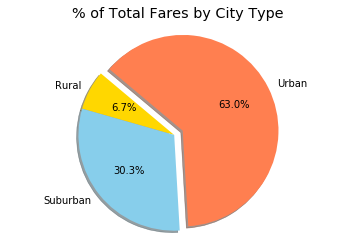

In [69]:
df_type_grp = df_city_ride_data.groupby("type")
explode = (0.0 ,0.0,0.1)
display = df_type_grp['fare'].sum().plot(kind="pie", title = "% of Total Fares by City Type", explode = explode,
                                          autopct="%1.1f%%",shadow=True, startangle=140 ,
                                          colors = list(clr.values()) )
plt.axis("equal")
display.set_ylabel("")
plt.show()

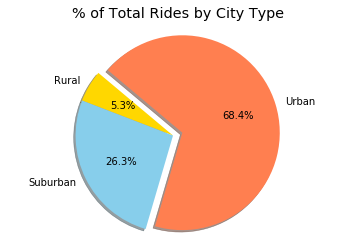

In [70]:
display = df_type_grp['ride_id'].count().plot(kind="pie", title = "% of Total Rides by City Type", explode = explode,
                                          autopct="%1.1f%%",shadow=True, startangle=140,colors = list(clr.values()))
plt.axis("equal")
display.set_ylabel("")
plt.show()

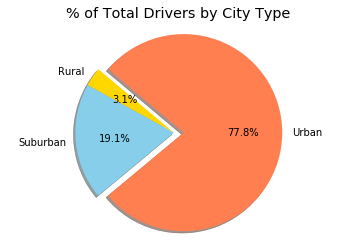

In [71]:
display = df_city_data.groupby("type")['driver_count'].sum().plot(kind="pie",title="% of Total Drivers by City Type"
                                        , explode = explode,
                                          autopct="%1.1f%%",shadow=True, startangle=140,colors = list(clr.values()))

plt.axis("equal")
display.set_ylabel("")
plt.show()
